# Finding the Number of New Grant Applications per Year (starting from 2002) in the Puppeteer Grant Dataset

## 1. Import Excel spreadsheets from the Grant Dataset: *Test TCD* and *Geog*

In [39]:
import xlrd

In [40]:
workbook = xlrd.open_workbook("/Users/vladobukhanich/Desktop/Desktop/github-local-repos/private/puppetry-datasets/Vlad_2_Grant_Master_Sheet 2002-2017 20170509.xlsx")

In [41]:
test_tcd = workbook.sheet_by_index(2)

geog = workbook.sheet_by_index(10)

## 2. Extract the regions from *Geog* into a list

In [42]:
regions = []

In [43]:
for col_num in range(geog.ncols):
    regions.append(geog.col_values(col_num)[0])

print(regions)

['Northeast', 'Midwest', 'South', 'West']


## 3. Import the library for finding pairs of similar words (Sequence Matcher ratio > 0.75) in *Test TCD*

In [44]:
from difflib import SequenceMatcher

In [45]:
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

## 4. Create an internal sheet for the companies in each region to track the first time and total number of times they applied for a grant

In [46]:
# midwest region, first time
mw_internal_sheet_f = []

# midwest region, total num times
mw_internal_sheet_t = []

# northeast region, first time
ne_internal_sheet_f = []

# northeast region, total num times
ne_internal_sheet_t = []

# south region, first time
s_internal_sheet_f = []

# south region, total num times
s_internal_sheet_t = []

# west region, first time
w_internal_sheet_f = []

# west region, total num times
w_internal_sheet_t = []

Parse through *Test TCD,* get the start row of each region, and store the companies in each internal sheet by region:

In [47]:
# initialize start row for Midwest
mw_start_row = 0

# initialize start row for Northeast
ne_start_row = 0

# initialize start row for South
s_start_row = 0

# initialize start row for West
w_start_row = 0

In [48]:
def get_start_row(reg_index):
    "Function to get the start row of each region"
    
    start_row = 0
    
    for row_num in range(test_tcd.nrows):
        if test_tcd.row_values(row_num)[0] == regions[reg_index]: 
            start_row = row_num+1
            
            print('Start row: ' + str(start_row))
            
            break
    
    return start_row

In [49]:
mw_start_row = get_start_row(1)

ne_start_row = get_start_row(0)

s_start_row = get_start_row(2)

w_start_row = get_start_row(3)

Start row: 5
Start row: 191
Start row: 881
Start row: 1047


In [50]:
def store_by_region(current_start_row, next_start_row, internal_sheet):
    "Void function to store the companies in each internal sheet by region"
    
    for row_num in range(current_start_row, next_start_row-1):
        if test_tcd.row_values(row_num)[0] != 'N/A':
            column = []

            for col_num in range(test_tcd.ncols):
                column.append(test_tcd.row_values(row_num)[col_num])
            internal_sheet.append(column)

    print(internal_sheet[:-5:-1]) # test print

Store by region for the internal sheets tracking only **first apps:**

In [51]:
store_by_region(mw_start_row, ne_start_row, mw_internal_sheet_f)

[['Arm of the Sea Theater', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Alison Heimstead', '', '', '', '', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', 1.0], ['Kurt Hartwig', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Lynn Zetzman', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0]]


In [52]:
store_by_region(ne_start_row, s_start_row, ne_internal_sheet_f)

[['Merrill Garbus', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Peter Deffet', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Tom Sarver', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Laurencio Ruiz', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0]]


In [53]:
store_by_region(s_start_row, w_start_row, s_internal_sheet_f)

[['Linda Zimmer', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Joan Leotta', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Kevin Taylor', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Jason Mulhausen', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', 1.0]]


In [54]:
store_by_region(w_start_row, test_tcd.nrows, w_internal_sheet_f)

[['Bill Jarcho', '', '', '', 1.0, '', '', '', 1.0, '', '', '', '', '', '', '', '', '', 2.0], ['Khaela Maricich', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ["Nancy O'Lally", '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Dana Squires', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', 1.0]]


Store by region for the internal sheets tracking the **total number of apps:**

In [55]:
store_by_region(mw_start_row, ne_start_row, mw_internal_sheet_t)

[['Arm of the Sea Theater', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Alison Heimstead', '', '', '', '', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', 1.0], ['Kurt Hartwig', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Lynn Zetzman', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0]]


In [56]:
store_by_region(ne_start_row, s_start_row, ne_internal_sheet_t)

[['Merrill Garbus', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Peter Deffet', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Tom Sarver', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Laurencio Ruiz', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0]]


In [57]:
store_by_region(s_start_row, w_start_row, s_internal_sheet_t)

[['Linda Zimmer', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Joan Leotta', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ['Kevin Taylor', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Jason Mulhausen', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', 1.0]]


In [58]:
store_by_region(w_start_row, test_tcd.nrows, w_internal_sheet_t)

[['Bill Jarcho', '', '', '', 1.0, '', '', '', 1.0, '', '', '', '', '', '', '', '', '', 2.0], ['Khaela Maricich', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 1.0], ["Nancy O'Lally", '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', 1.0], ['Dana Squires', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '', '', '', 1.0]]


Sort all internal sheets by company name (desc.):

In [59]:
mw_internal_sheet_f.sort(key=lambda x: x[0])

mw_internal_sheet_t.sort(key=lambda x: x[0])

ne_internal_sheet_f.sort(key=lambda x: x[0])

ne_internal_sheet_t.sort(key=lambda x: x[0])

s_internal_sheet_f.sort(key=lambda x: x[0])

s_internal_sheet_t.sort(key=lambda x: x[0])

w_internal_sheet_f.sort(key=lambda x: x[0])

w_internal_sheet_t.sort(key=lambda x: x[0])

In [60]:
def find_first_app(internal_sheet):
    "Void function to find out the first application of each company, by region"

    for row_num in range(len(internal_sheet)):
        if internal_sheet[row_num][0] != "(removed)":
            count = 0

            first_app = 0

            for col_num in range(len(internal_sheet[0])):
                if internal_sheet[row_num][col_num] == 1 and count == 0:
                    first_app = col_num

                    count += 1

                    continue
                if internal_sheet[row_num][col_num] == 1 and count > 0:
                    internal_sheet[row_num][col_num] = ''

                    continue

            i = 1

            if row_num+i <= len(internal_sheet)-1:
                # if the similarity score between the current company and the company i rows below is greater than 
                # 0.75, count them as one company and merge all of their first applications
                
                while similarity(internal_sheet[row_num][0], internal_sheet[row_num+i][0]) > 0.75: 
                    for col_num in range(len(internal_sheet[0])):
                        if internal_sheet[row_num+i][col_num] == 1 and internal_sheet[row_num][col_num] == '' and col_num < first_app:
                            internal_sheet[row_num+i][col_num] = ''

                            internal_sheet[row_num][col_num] = 1

                            internal_sheet[row_num][first_app] = ''

                            first_app = col_num
                        elif internal_sheet[row_num+i][col_num] == 1 and col_num >= first_app:
                            internal_sheet[row_num+i][col_num] = ''

                    internal_sheet[row_num+i][0] = "(removed)"

                    i += 1

                    if row_num+i > len(internal_sheet)-1:
                        break

In [61]:
find_first_app(mw_internal_sheet_f)

find_first_app(ne_internal_sheet_f)

find_first_app(s_internal_sheet_f)

find_first_app(w_internal_sheet_f)

## 5. Create a dictionary for each internal sheet to keep track of how many first (new) applications, applications in total, and new applications as a fraction of the total occurred each year from 2002 - 2018

In [62]:
years = []

for yr in range(2002, 2019):
    years.append(yr)

In [63]:
mw_new_yrly_apps = {}

ne_new_yrly_apps = {}

s_new_yrly_apps = {}

w_new_yrly_apps = {}

for yr in years:
    mw_new_yrly_apps[yr] = 0

    ne_new_yrly_apps[yr] = 0

    s_new_yrly_apps[yr] = 0

    w_new_yrly_apps[yr] = 0

In [64]:
mw_ttl_yrly_apps = {}

ne_ttl_yrly_apps = {}

s_ttl_yrly_apps = {}

w_ttl_yrly_apps = {}

for yr in years:
    mw_ttl_yrly_apps[yr] = 0

    ne_ttl_yrly_apps[yr] = 0

    s_ttl_yrly_apps[yr] = 0

    w_ttl_yrly_apps[yr] = 0

In [65]:
mw_pcntg_yrly_apps = {}

ne_pcntg_yrly_apps = {}

s_pcntg_yrly_apps = {}

w_pcntg_yrly_apps = {}

for yr in years:
    mw_pcntg_yrly_apps[yr] = 0

    ne_pcntg_yrly_apps[yr] = 0

    s_pcntg_yrly_apps[yr] = 0

    w_pcntg_yrly_apps[yr] = 0

In [66]:
def count_apps(internal_sheet, yrly_apps):
    """Void function to count how many new apps in each year for each region's internal sheet. Insert each 
        count as a value into the corresponding region's dictionary (key: year - value: count)"""
    
    for col_num in range(1, len(internal_sheet[0])-1):
        count = 0
        
        for row_num in range(len(internal_sheet)-1):
            if internal_sheet[row_num][0] != "(removed)" and internal_sheet[row_num][col_num] != '':  
                count += internal_sheet[row_num][col_num]

        yrly_apps[years[col_num-1]] = count

In [67]:
count_apps(mw_internal_sheet_f, mw_new_yrly_apps)

count_apps(mw_internal_sheet_t, mw_ttl_yrly_apps)

count_apps(ne_internal_sheet_f, ne_new_yrly_apps)

count_apps(ne_internal_sheet_t, ne_ttl_yrly_apps)

count_apps(s_internal_sheet_f, s_new_yrly_apps)

count_apps(s_internal_sheet_t, s_ttl_yrly_apps)

count_apps(w_internal_sheet_f, w_new_yrly_apps)

count_apps(w_internal_sheet_t, w_ttl_yrly_apps)

In [68]:
for yr in years:
    mw_pcntg_yrly_apps[yr] = (mw_new_yrly_apps[yr] / mw_ttl_yrly_apps[yr]) * 100
    
    ne_pcntg_yrly_apps[yr] = (ne_new_yrly_apps[yr] / ne_ttl_yrly_apps[yr]) * 100
    
    s_pcntg_yrly_apps[yr] = (s_new_yrly_apps[yr] / s_ttl_yrly_apps[yr]) * 100
    
    w_pcntg_yrly_apps[yr] = (w_new_yrly_apps[yr] / w_ttl_yrly_apps[yr]) * 100

In [70]:
import matplotlib.pylab as plt

In [71]:
mw_lists_new = sorted(mw_new_yrly_apps.items()) # sorted by key, return a list of tuples

ne_lists_new = sorted(ne_new_yrly_apps.items())

s_lists_new = sorted(s_new_yrly_apps.items())

w_lists_new = sorted(w_new_yrly_apps.items())

x0, y0 = zip(*mw_lists_new) # unpack a list of pairs into two tuples

x1, y1 = zip(*ne_lists_new)

x2, y2 = zip(*s_lists_new)

x3, y3 = zip(*w_lists_new)

In [72]:
mw_lists_ttl = sorted(mw_ttl_yrly_apps.items()) # sorted by key, return a list of tuples

ne_lists_ttl = sorted(ne_ttl_yrly_apps.items())

s_lists_ttl = sorted(s_ttl_yrly_apps.items())

w_lists_ttl = sorted(w_ttl_yrly_apps.items())

x4, y4 = zip(*mw_lists_ttl) # unpack a list of pairs into two tuples

x5, y5 = zip(*ne_lists_ttl)

x6, y6 = zip(*s_lists_ttl)

x7, y7 = zip(*w_lists_ttl)

In [73]:
mw_lists_pcntg = sorted(mw_pcntg_yrly_apps.items()) # sorted by key, return a list of tuples

ne_lists_pcntg = sorted(ne_pcntg_yrly_apps.items())

s_lists_pcntg = sorted(s_pcntg_yrly_apps.items())

w_lists_pcntg = sorted(w_pcntg_yrly_apps.items())

x8, y8 = zip(*mw_lists_pcntg) # unpack a list of pairs into two tuples

x9, y9 = zip(*ne_lists_pcntg)

x10, y10 = zip(*s_lists_pcntg)

x11, y11 = zip(*w_lists_pcntg)

## 6. Use the above dictionaries to create graphs

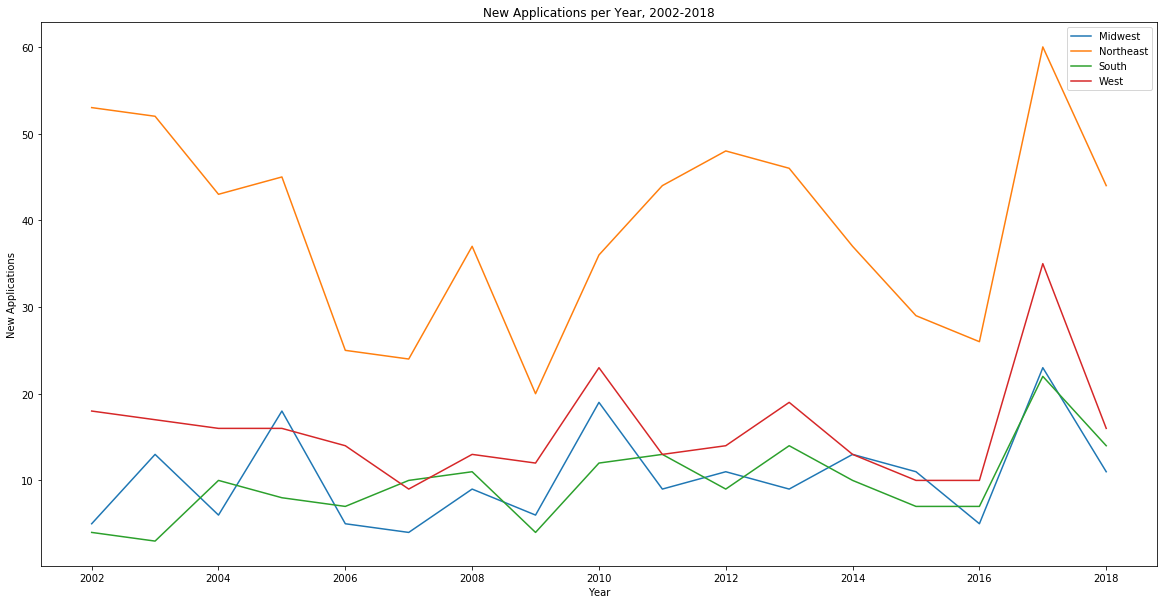

In [74]:
plt.figure(figsize=(20,10))

line0 = plt.plot(x0, y0)

line1= plt.plot(x1, y1)

line2 = plt.plot(x2, y2)

line3 = plt.plot(x3, y3)

plt.legend([regions[1], regions[0], regions[2], regions[3]])

plt.xlabel('Year')

plt.ylabel('New Applications')

plt.title('New Applications per Year, 2002-2018')

plt.show();

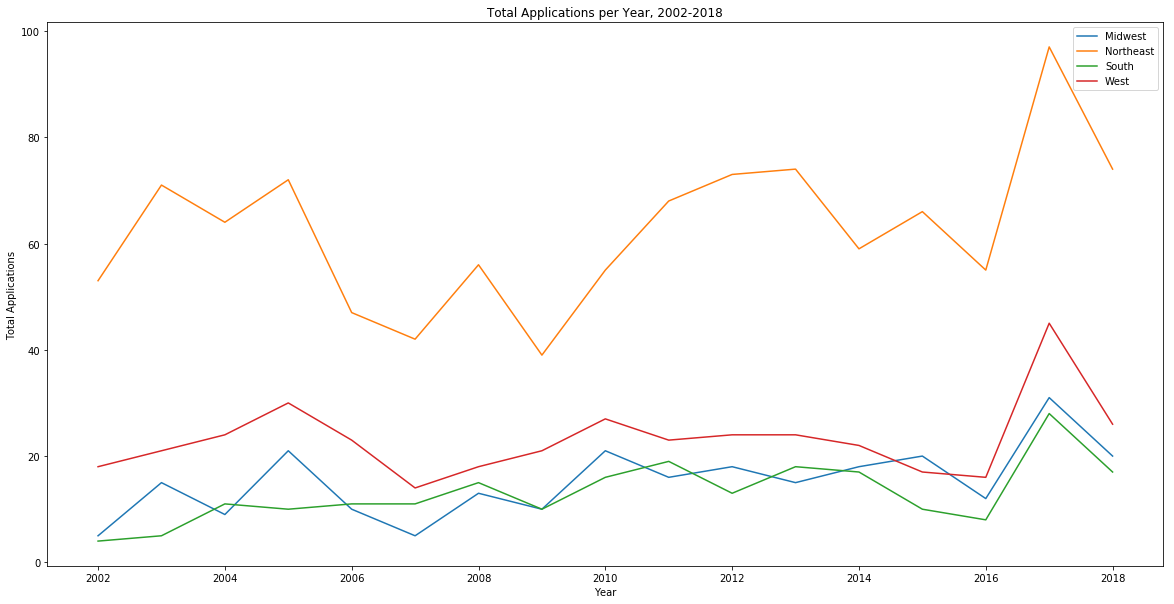

In [75]:
plt.figure(figsize=(20,10))

line4 = plt.plot(x4, y4)

line5= plt.plot(x5, y5)

line6 = plt.plot(x6, y6)

line7 = plt.plot(x7, y7)

plt.legend([regions[1], regions[0], regions[2], regions[3]])

plt.xlabel('Year')

plt.ylabel('Total Applications')

plt.title('Total Applications per Year, 2002-2018')

plt.show();

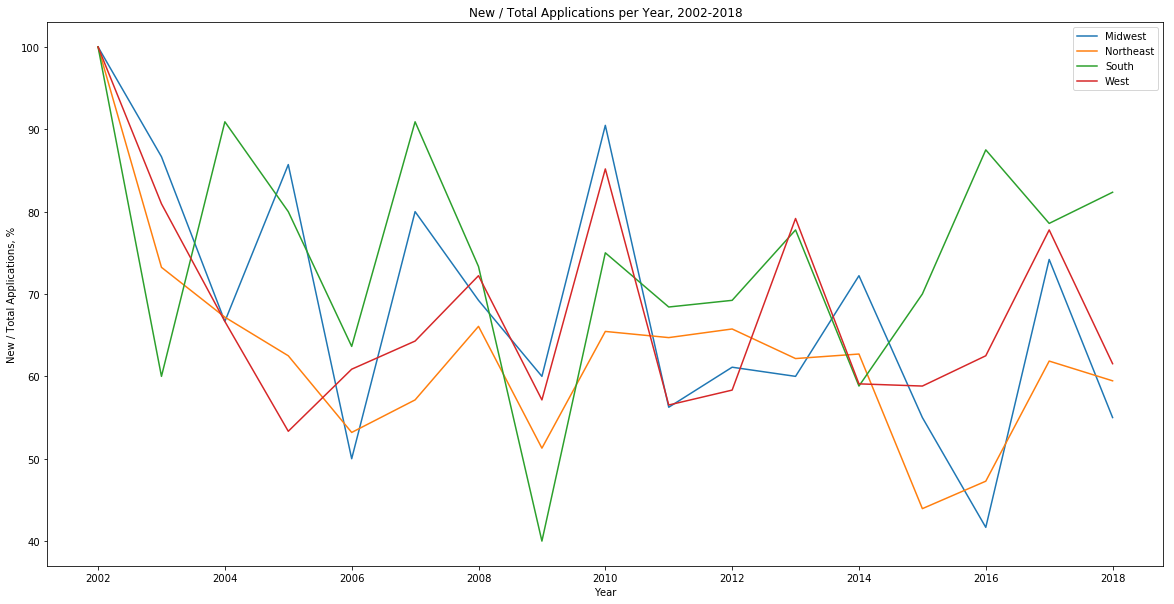

In [76]:
plt.figure(figsize=(20,10))

line8 = plt.plot(x8, y8)

line9 = plt.plot(x9, y9)

line10 = plt.plot(x10, y10)

line11 = plt.plot(x11, y11)

plt.legend([regions[1], regions[0], regions[2], regions[3]])

plt.xlabel('Year')

plt.ylabel('New / Total Applications, %')

plt.title('New / Total Applications per Year, 2002-2018')

plt.show();

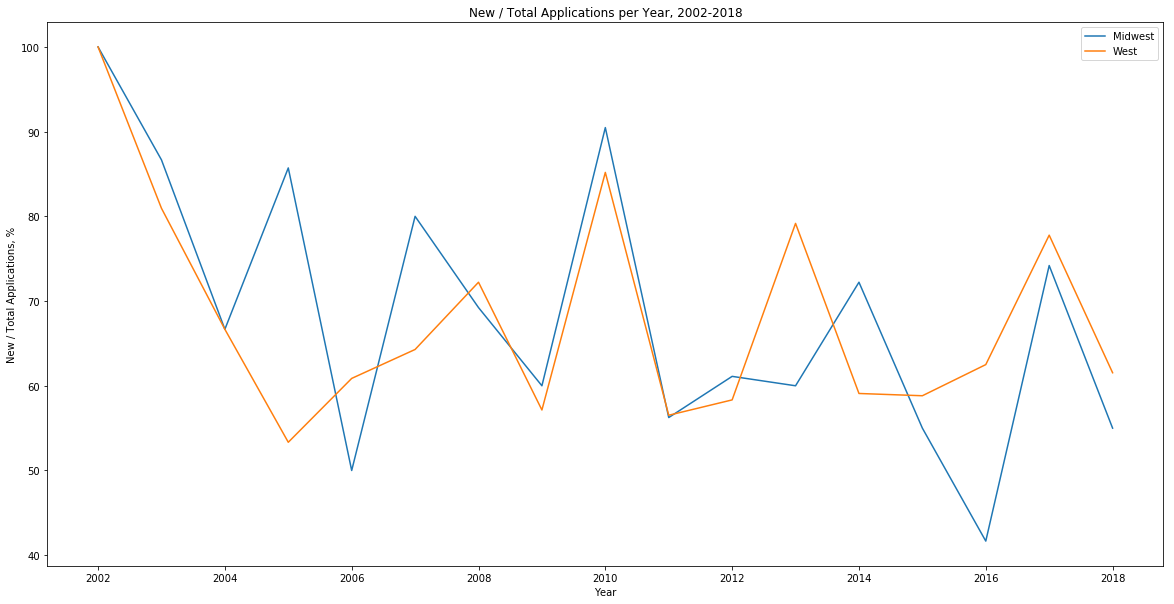

In [77]:
plt.figure(figsize=(20,10))

plt.plot(x8, y8)

plt.plot(x11, y11)

plt.legend([regions[1], regions[3]])

plt.xlabel('Year')

plt.ylabel('New / Total Applications, %')

plt.title('New / Total Applications per Year, 2002-2018')

plt.show();

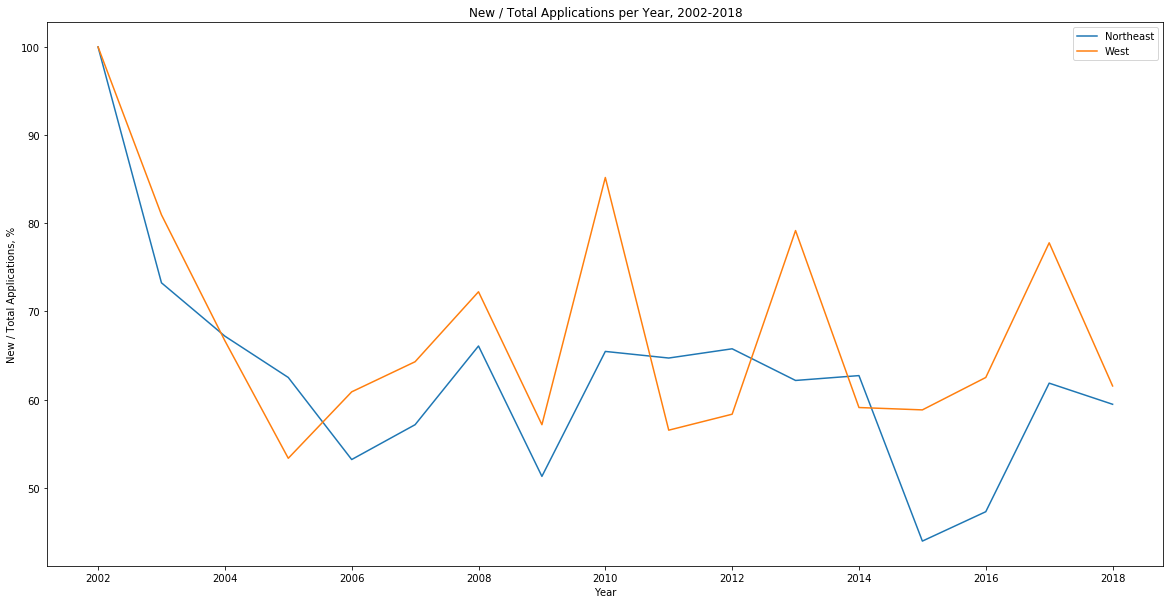

In [78]:
plt.figure(figsize=(20,10))

plt.plot(x9, y9)

plt.plot(x11, y11)

plt.legend([regions[0], regions[3]])

plt.xlabel('Year')

plt.ylabel('New / Total Applications, %')

plt.title('New / Total Applications per Year, 2002-2018')

plt.show();

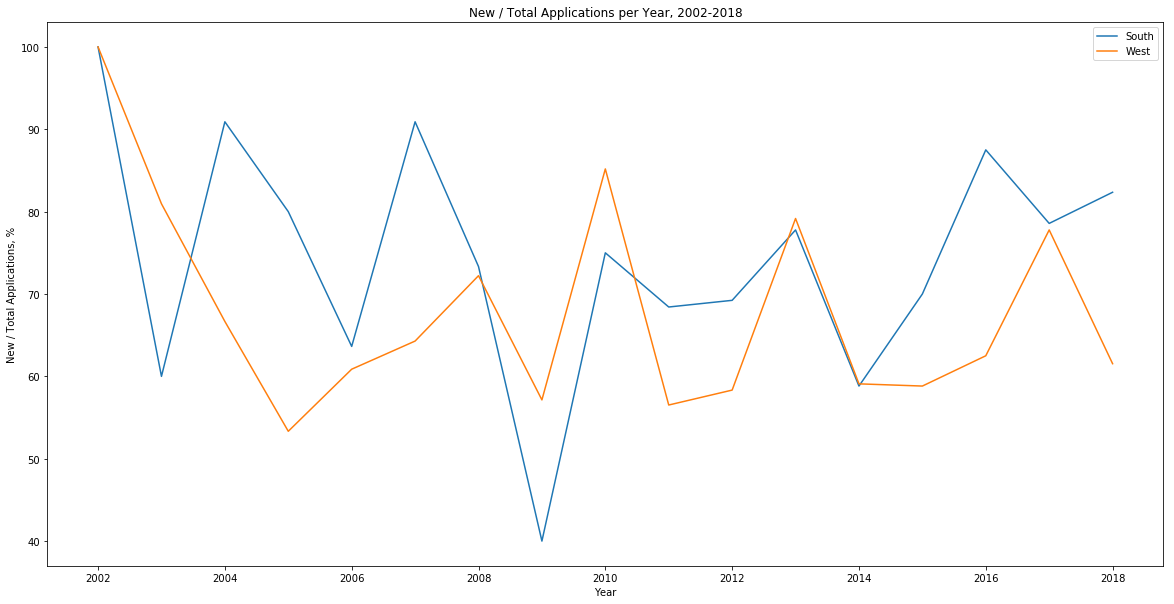

In [79]:
plt.figure(figsize=(20,10))

plt.plot(x10, y10)

plt.plot(x11, y11)

plt.legend([regions[2], regions[3]])

plt.xlabel('Year')

plt.ylabel('New / Total Applications, %')

plt.title('New / Total Applications per Year, 2002-2018')

plt.show();